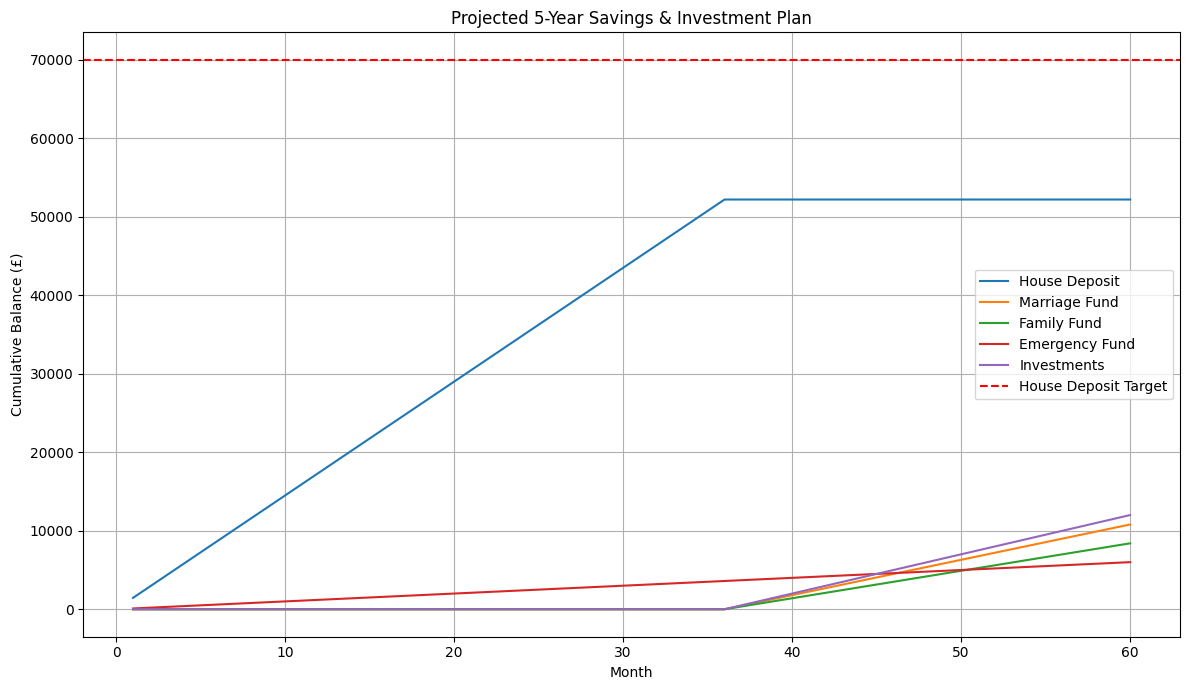

,Month,House Deposit,Marriage Fund,Family Fund,Emergency Fund,Investments
1,1,1450,0,0,100,0
2,2,2900,0,0,200,0
3,3,4350,0,0,300,0
4,4,5800,0,0,400,0
5,5,7250,0,0,500,0
6,6,8700,0,0,600,0
7,7,10150,0,0,700,0
8,8,11600,0,0,800,0
9,9,13050,0,0,900,0
10,10,14500,0,0,1000,0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 5-year parameters
months = 60
months_range = np.arange(1, months+1)

# Income projection: 15-30% increase over 5 years
income_start = 3200
income_end_low = 3680
income_end_high = 4160

income_projection_low = np.linspace(income_start, income_end_low, months)
income_projection_high = np.linspace(income_start, income_end_high, months)

# Initialize goals and monthly allocations
allocations = pd.DataFrame(index=months_range, columns=['House Deposit','Marriage Fund','Family Fund','Emergency Fund','Investments'])

# Months 1-36: House deposit priority, emergency fund maintained, investments continue
for m in months_range:
    if m <=36:
        allocations.loc[m] = [1450, 0, 0, 100, 0]
    else:
        # After house deposit, allocate to marriage/family, emergency fund, and investments
        allocations.loc[m] = [0, 450, 350, 100, 500]

# Compute cumulative balances for each goal
cumulative_balances = allocations.cumsum()

# Plot cumulative balances for base scenario
plt.figure(figsize=(12,7))
for col in cumulative_balances.columns:
    plt.plot(months_range, cumulative_balances[col], label=col)

plt.title('Projected 5-Year Savings & Investment Plan')
plt.xlabel('Month')
plt.ylabel('Cumulative Balance (£)')
plt.axhline(y=70000, color='r', linestyle='--', label='House Deposit Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create DataFrame for export
cumulative_balances['Month'] = months_range
cumulative_balances = cumulative_balances[['Month'] + [col for col in cumulative_balances.columns if col != 'Month']]
cumulative_balances
